In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Data Collection/dataset.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,page_id,title,text,quality
0,9941,Æthelberht of Kent,{{Short description|King of Kent (589–616)}}\n...,FA
1,128158,Macintosh Classic,{{Short description|Personal computer by Apple...,FA
2,4925,Blue whale,"{{Short description|Baleen whale, largest anim...",FA
3,311236,Water rail,{{short description|Species of bird}}\n{{Speci...,FA
4,91171,Hitler Diaries,{{short description|Forged journals purportedl...,FA
...,...,...,...,...
5195,98303,Hedetet,{{short description|Ancient Egyptian scorpion ...,Stub
5196,267460,Glass Eels,{{Use dmy dates|date=April 2022}}\n{{italic ti...,Stub
5197,250544,Carlos Manuel Pruneda,{{Short description|Cuban musician}}\n{{BLP so...,Stub
5198,218159,Romsås,"{{Short description|Neighborhood in Oslo, Norw...",Stub


In [ ]:
df['quality'].value_counts()

quality
FA       1300
GA       1300
B         650
C         650
Start     650
Stub      650
Name: count, dtype: int64

- FA+GA 520(260+260)
- B+C+Start+Stub 520(130*4)
- 20% : test / 80% : train

In [ ]:
# duplicates
df.duplicated().sum()

0

__text features__
- character count
- word count
- sentence count
- syllable count
- complex word count
- polysyllable count

__structure features__
- section count
- subsection count
- paragraph count
- mean section size
- mean paragraph size
- longest section size
- shortest section size
- longest-shortest section ratio
- citation count
- external link count
- internal link count
- links per text length
- image count
- images per text lenght
- infobox?

__style features__
- mean sentence size
- largest sentence size
- shortest sentence size
- question count
- question per sentence count
- exclamation count
- exclamation per sentence count
- number of sentence start with a pronoun

__readability features__
- automated readability index
- Coleman-Liau
- Flesch Reading Ease
- Flesch-Kincaid Score
- Gunning Fog index
- LIX
- Smog-Grading?
- Dale-Chall?
- Linsear Write Formula?

__review features__
- age of the articles
- age per review
- review count
- reviews per day
- user count
- reviews per user
- registered user count
- anonymous user count
- occasional user count
- diversity
- discussion count
- revert count

__quality__
- quality

###  NLP preprocessing

In [ ]:
df_nlp = df.copy()
df_nlp

,page_id,title,text,quality
0,9941,Æthelberht of Kent,{{Short description|King of Kent (589–616)}}\n...,FA
1,128158,Macintosh Classic,{{Short description|Personal computer by Apple...,FA
2,4925,Blue whale,"{{Short description|Baleen whale, largest anim...",FA
3,311236,Water rail,{{short description|Species of bird}}\n{{Speci...,FA
4,91171,Hitler Diaries,{{short description|Forged journals purportedl...,FA
...,...,...,...,...
5195,98303,Hedetet,{{short description|Ancient Egyptian scorpion ...,Stub
5196,267460,Glass Eels,{{Use dmy dates|date=April 2022}}\n{{italic ti...,Stub
5197,250544,Carlos Manuel Pruneda,{{Short description|Cuban musician}}\n{{BLP so...,Stub
5198,218159,Romsås,"{{Short description|Neighborhood in Oslo, Norw...",Stub


- [[how it appears on the text]] : internal link
- [[original name|how it appears on the text]] : internal link
- /n/n : paragraphs
- {{Infobox : infobox
- [[#section in the same article|how it appears on the text]] : section link
- [[wikt: article title|how it appears on the text]] : wiktionary link
- \'\'\'word\'\'\' : bold
- \'\'word\'\' : italic
- \' : '
- {{nbsp}}... : ...
- ==section title== : section+line underneath
- ===subsection title=== : subsection+bold
- {{Further|link1|link2}} : "Further information: link1 and link2"
- {{Main|link1}} : "Main article: link1
- 4{{nbsp}}August, 6{{nbsp}}June 1944 : date
- \n[[File: ]]\n : pic+discription
- Caen—{{cvt|9|mi}} inland—as : Caen - 9 mi (14km) inland -
- {{cvt|7.5|mi}} : 7.5 mi (12.1km)
- {{sfn|Williams|2004|p=24}} : citation(numbers) Williams 2004, p.24
- <ref>War Diaries of 8th (KRI) Hussars – June 1944</ref> : reference?
- {{efn|discription.{{sfn|Forty|2004|p=29}}}} : citation(alphabets) discription+citation
- {{Quote box\n|align=left\n|width=20%\n|quote=!quote!}} : quotation box
- n\n{{blockquote|quote}}\n\n : blockquote
- {{blockquote|quote~|person}} : blockquote with person
- alphabet : notes
- footnotes, references, further reading, external links


- https://www.mediawiki.org/wiki/Help:Formatting

In [ ]:
import re

# add infobox, tables?
def remove_html_tags(text):
    # Remove HTML tags <...>
    clean_text = re.sub(r'<[^>]*>', ' ', text)
    # Remove wiki-style tags
    clean_text = re.split(r'==\s*(?:See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', clean_text, maxsplit=1)[0] #truncate text from sections
    clean_text = re.sub(r'{{blockquote\|(.+?)\|.*?}}', r'\1', clean_text, flags=re.DOTALL) #remaining quote
    clean_text = re.sub(r'{{nbsp}}', ' ', clean_text) #non-breaking spaces
    clean_text = re.sub(r'\{\{[^}]*\}\}', ' ', clean_text) #{{...}}: denote templates and metadata
    clean_text = re.sub(r'\[\[[^\]]*\|', ' ', clean_text) #[[...| : [[link|Display Text]]
    clean_text = re.sub(r'\[\[File:[^\]]*\]\]', ' ', clean_text) #[[File: ]]
    clean_text = re.sub(r'\{\|[^}]*?\|\}', ' ', clean_text, flags=re.DOTALL) #tables
    clean_text = re.sub(r'\n+', ' ', clean_text) #new lines
    clean_text = re.sub(r'[^a-zA-Z0-9\s.!?]', '', clean_text) #remove all special characters
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

In [ ]:
import re

def remove_html_tags(text):
    # Remove HTML tags <...>
    clean_text = re.sub(r'<[^>]*>', '', text)
    # Remove wiki-style tags
    clean_text = re.split(r'==\s*(See also|References|Notes|Footnotes|Sources|External links|Works cited|Further reading)\s*==', text)[0] #truncate text from sections
    clean_text = re.sub(r'{{blockquote\|(.+?)\|.*?}}', r'\1', clean_text, flags=re.DOTALL) #remaining quote
    clean_text = re.sub(r'{{nbsp}}', ' ', clean_text) #non-breaking spaces
    clean_text = re.sub(r'\{\{[^}]*\}\}', '', clean_text) #{{...}}: denote templates and metadata
    clean_text = re.sub(r'\[\[[^\]]*\|', '', clean_text) #[[...| : [[link|Display Text]]
    clean_text = re.sub(r"'{2,}", '', clean_text)  # bold and italic
    clean_text = re.sub(r'={2,}', '', clean_text) #sections
    clean_text = re.sub(r'\[\[File:[^\]]*\]\]', '', clean_text) #[[File: ]]
    clean_text = re.sub(r'\[\[', '', clean_text) #[[
    clean_text = re.sub(r'\]\]', '', clean_text) #]]
    clean_text = re.sub(r"''+", '', clean_text) #'' or ''' : italic and bold
    clean_text = re.sub(r'\n+', ' ', clean_text) #new lines
    clean_text = re.sub(r'={2,}\s*([^=]+?)\s*={2,}', r'\1', clean_text)
    clean_text = re.sub(r'\{\{[^}]*\}\}', '', clean_text) #remaining {{...}}
    return clean_text

In [ ]:
df_nlp['text_processed'] = df_nlp['text'].apply(remove_html_tags)
df_nlp

,page_id,title,text,quality,text_processed
0,9941,Æthelberht of Kent,{{Short description|King of Kent (589–616)}}\n...,FA,deathplace burialplace St Augustines Abbey rel...
1,128158,Macintosh Classic,{{Short description|Personal computer by Apple...,FA,price with 40 MB hard disk and 2 MB RAM discon...
2,4925,Blue whale,"{{Short description|Baleen whale, largest anim...",FA,status EN statussystem IUCN3.1 statusref statu...
3,311236,Water rail,{{short description|Species of bird}}\n{{Speci...,FA,genus Rallus species aquaticus authority Linna...
4,91171,Hitler Diaries,{{short description|Forged journals purportedl...,FA,Stern s front page on 28 April 1983 The Hitler...
...,...,...,...,...,...
5195,98303,Hedetet,{{short description|Ancient Egyptian scorpion ...,Stub,Hededet or Hedjedjet dd.t is a scorpion goddes...
5196,267460,Glass Eels,{{Use dmy dates|date=April 2022}}\n{{italic ti...,Stub,Glass Eels is a play written by Nell Leyshon b...
5197,250544,Carlos Manuel Pruneda,{{Short description|Cuban musician}}\n{{BLP so...,Stub,Carlos Manuel born 1973 is a Cuban singer know...
5198,218159,Romsås,"{{Short description|Neighborhood in Oslo, Norw...",Stub,Groruddalen with the hill of Romss in the back...


### Doc2vec

https://github.com/piskvorky/gensim/blob/develop/docs/notebooks/doc2vec-wikipedia.ipynb

In [ ]:
!pip install gensim

In [ ]:
doc2vec = df_nlp.copy()
doc2vec = doc2vec[['text_processed', 'quality']]
doc2vec

,text_processed,quality
0,deathplace burialplace St Augustines Abbey rel...,FA
1,price with 40 MB hard disk and 2 MB RAM discon...,FA
2,status EN statussystem IUCN3.1 statusref statu...,FA
3,genus Rallus species aquaticus authority Linna...,FA
4,Stern s front page on 28 April 1983 The Hitler...,FA
...,...,...
5195,Hededet or Hedjedjet dd.t is a scorpion goddes...,Stub
5196,Glass Eels is a play written by Nell Leyshon b...,Stub
5197,Carlos Manuel born 1973 is a Cuban singer know...,Stub
5198,Groruddalen with the hill of Romss in the back...,Stub


In [ ]:
# convert into lower cases
doc2vec['text_processed'] = doc2vec['text_processed'].str.lower()

In [ ]:
# remove punctuations
import nltk
import string
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

doc2vec['text_processed'] = doc2vec['text_processed'].apply(lambda text: remove_punctuation(text))

In [ ]:
# remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

doc2vec['text_processed'] = doc2vec['text_processed'].apply(lambda text: remove_stopwords(text))

In [ ]:
# remove numbers
def remove_numbers(text):
    return " ".join([word for word in str(text).split() if word.isalpha()])

doc2vec['text_processed'] = doc2vec['text_processed'].apply(lambda text: remove_numbers(text))

In [ ]:
# lemmatization
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

doc2vec['text_processed'] = doc2vec['text_processed'].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
doc2vec

,text_processed,quality
0,deathplace burialplace st augustine abbey reli...,FA
1,price mb hard disk mb ram discontinue unitssol...,FA
2,status en statussystem statusref cite january ...,FA
3,genus rallus specie aquaticus authority linnae...,FA
4,stern front page april hitler diary series six...,FA
...,...,...
5195,hededet hedjedjet ddt scorpion goddess ancient...,Stub
5196,glass eel play write nell leyshon broadcast bb...,Stub
5197,carlos manuel bear cuban singer know simply ca...,Stub
5198,groruddalen hill romss background rom church r...,Stub


In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk

# Download the punkt tokenizer for NLTK
nltk.download('punkt')

# Preprocess the text (tokenization)
doc2vec['text_tokenized'] = doc2vec['text_processed'].apply(lambda x: word_tokenize(x.lower()))

# Create TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(doc2vec['text_tokenized'])]

# Train a Doc2Vec model
model = Doc2Vec(documents, vector_size=20, window=2, min_count=1, workers=4)

# Infer vectors for each document in the DataFrame
doc2vec['doc2vec_vector'] = doc2vec['text_tokenized'].apply(lambda x: model.infer_vector(x))

doc2vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text_processed,quality,text_tokenized,doc2vec_vector
0,deathplace burialplace st augustine abbey reli...,FA,"[deathplace, burialplace, st, augustine, abbey...","[1.6378042, -1.3790098, -3.1246614, 6.087968, ..."
1,price mb hard disk mb ram discontinue unitssol...,FA,"[price, mb, hard, disk, mb, ram, discontinue, ...","[1.4801595, 1.3353403, -1.8237944, -3.5620701,..."
2,status en statussystem statusref cite january ...,FA,"[status, en, statussystem, statusref, cite, ja...","[-5.4591374, -1.6240929, 0.21434748, 0.0214107..."
3,genus rallus specie aquaticus authority linnae...,FA,"[genus, rallus, specie, aquaticus, authority, ...","[-3.2268777, 0.12563373, 1.980967, 1.7206905, ..."
4,stern front page april hitler diary series six...,FA,"[stern, front, page, april, hitler, diary, ser...","[1.879736, -1.5600429, -6.249099, 3.4955826, 0..."
...,...,...,...,...
5195,hededet hedjedjet ddt scorpion goddess ancient...,Stub,"[hededet, hedjedjet, ddt, scorpion, goddess, a...","[-0.28870964, 0.20918466, -0.7275048, 0.352678..."
5196,glass eel play write nell leyshon broadcast bb...,Stub,"[glass, eel, play, write, nell, leyshon, broad...","[0.4621539, 0.17994754, -0.6930762, 0.6281098,..."
5197,carlos manuel bear cuban singer know simply ca...,Stub,"[carlos, manuel, bear, cuban, singer, know, si...","[-0.15335168, 0.74176204, -0.9906701, 0.419429..."
5198,groruddalen hill romss background rom church r...,Stub,"[groruddalen, hill, romss, background, rom, ch...","[0.20356993, 0.6681619, -0.5798524, 0.7539782,..."


In [ ]:
doc2vec['quality2'] = np.where((doc2vec['quality']=='FA')|(doc2vec['quality']=='GA'), 'reliable', 'non-reliable')
doc2vec

,text_processed,quality,text_tokenized,doc2vec_vector,quality2
0,deathplace burialplace st augustine abbey reli...,FA,"[deathplace, burialplace, st, augustine, abbey...","[1.6378042, -1.3790098, -3.1246614, 6.087968, ...",reliable
1,price mb hard disk mb ram discontinue unitssol...,FA,"[price, mb, hard, disk, mb, ram, discontinue, ...","[1.4801595, 1.3353403, -1.8237944, -3.5620701,...",reliable
2,status en statussystem statusref cite january ...,FA,"[status, en, statussystem, statusref, cite, ja...","[-5.4591374, -1.6240929, 0.21434748, 0.0214107...",reliable
3,genus rallus specie aquaticus authority linnae...,FA,"[genus, rallus, specie, aquaticus, authority, ...","[-3.2268777, 0.12563373, 1.980967, 1.7206905, ...",reliable
4,stern front page april hitler diary series six...,FA,"[stern, front, page, april, hitler, diary, ser...","[1.879736, -1.5600429, -6.249099, 3.4955826, 0...",reliable
...,...,...,...,...,...
5195,hededet hedjedjet ddt scorpion goddess ancient...,Stub,"[hededet, hedjedjet, ddt, scorpion, goddess, a...","[-0.28870964, 0.20918466, -0.7275048, 0.352678...",non-reliable
5196,glass eel play write nell leyshon broadcast bb...,Stub,"[glass, eel, play, write, nell, leyshon, broad...","[0.4621539, 0.17994754, -0.6930762, 0.6281098,...",non-reliable
5197,carlos manuel bear cuban singer know simply ca...,Stub,"[carlos, manuel, bear, cuban, singer, know, si...","[-0.15335168, 0.74176204, -0.9906701, 0.419429...",non-reliable
5198,groruddalen hill romss background rom church r...,Stub,"[groruddalen, hill, romss, background, rom, ch...","[0.20356993, 0.6681619, -0.5798524, 0.7539782,...",non-reliable


In [ ]:
doc2vec['quality2'] = doc2vec['quality2'].map({'reliable':1, 'non-reliable':0})

In [ ]:
experiment1 = doc2vec[['doc2vec_vector', 'quality2']]
experiment1

,doc2vec_vector,quality2
0,"[1.6378042, -1.3790098, -3.1246614, 6.087968, ...",1
1,"[1.4801595, 1.3353403, -1.8237944, -3.5620701,...",1
2,"[-5.4591374, -1.6240929, 0.21434748, 0.0214107...",1
3,"[-3.2268777, 0.12563373, 1.980967, 1.7206905, ...",1
4,"[1.879736, -1.5600429, -6.249099, 3.4955826, 0...",1
...,...,...
5195,"[-0.28870964, 0.20918466, -0.7275048, 0.352678...",0
5196,"[0.4621539, 0.17994754, -0.6930762, 0.6281098,...",0
5197,"[-0.15335168, 0.74176204, -0.9906701, 0.419429...",0
5198,"[0.20356993, 0.6681619, -0.5798524, 0.7539782,...",0


In [ ]:
from sklearn.model_selection import train_test_split

X = list(experiment1['doc2vec_vector'])
y = experiment1['quality2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_estimator(model ,X_test, y_test)

In [ ]:
# Logistic Regression with count vectorizer
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train, y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       507
           1       0.80      0.78      0.79       533

    accuracy                           0.79      1040
   macro avg       0.79      0.79      0.79      1040
weighted avg       0.79      0.79      0.79      1040

Train_Set
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2093
           1       0.79      0.84      0.81      2067

    accuracy                           0.81      4160
   macro avg       0.81      0.81      0.81      4160
weighted avg       0.81      0.81      0.81      4160



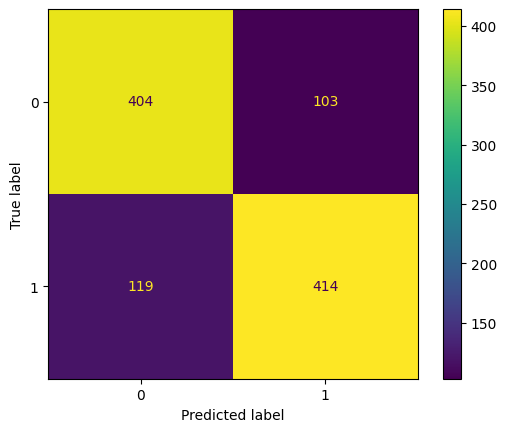

In [ ]:
print("LOG MODEL")

eval(log, X_train, X_test)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, random_state=101)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
                log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8021634615384615

 precision-0          score for count : 0.8225986248803311

 recall-0             score for count : 0.774023695602643

 f1-0                 score for count : 0.7973356995561589

 precision-1          score for count : 0.784397939905264

 recall-1             score for count : 0.830690399137001

 f1-1                 score for count : 0.8066736368997297



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(y_test, y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.8787740858746776


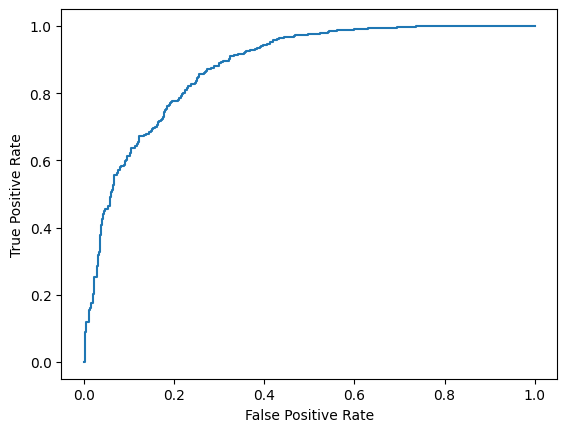

In [ ]:
log_prob = log.predict_proba(X_test)
log_prob = log_prob[:, 1]
plot_roc_curve(y_test, log_prob)
print(f'model 1 AUC score: {roc_auc_score(y_test, log_prob)}')

In [ ]:
# SVM with count vectorizer
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       507
           1       0.79      0.79      0.79       533

    accuracy                           0.79      1040
   macro avg       0.79      0.79      0.79      1040
weighted avg       0.79      0.79      0.79      1040

Train_Set
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      2093
           1       0.78      0.84      0.81      2067

    accuracy                           0.80      4160
   macro avg       0.80      0.80      0.80      4160
weighted avg       0.80      0.80      0.80      4160



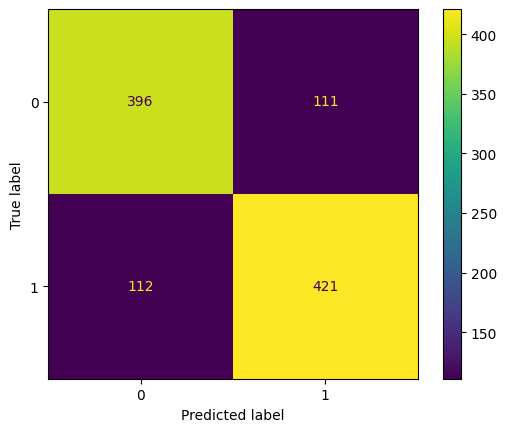

In [ ]:
print("SVC MODEL")

eval(svc, X_train, X_test)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.7999999999999999

 precision-0          score for count : 0.8261592718607774

 recall-0             score for count : 0.7630325814536341

 f1-0                 score for count : 0.7931780225435446

 precision-1          score for count : 0.7776675479246906

 recall-1             score for count : 0.8374536841611556

 f1-1                 score for count : 0.8063246976200966



model 3 AUC score: 0.8744851626941395


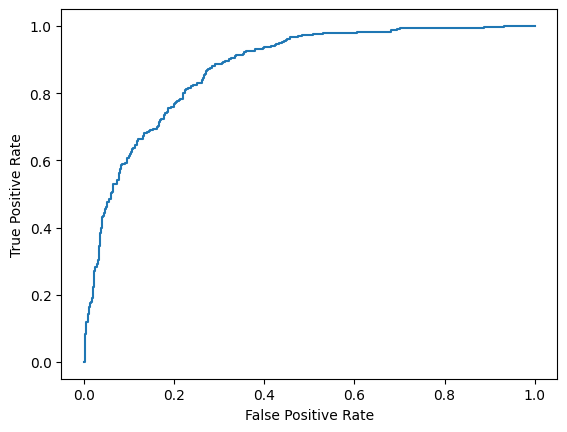

In [ ]:
svm_prob = svc._predict_proba_lr(X_test)
svm_prob = svm_prob[:, 1]
plot_roc_curve(y_test, svm_prob)
print(f'model 3 AUC score: {roc_auc_score(y_test, svm_prob)}')

In [ ]:
# Random Forest with count vectorizer
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       507
           1       0.80      0.83      0.82       533

    accuracy                           0.81      1040
   macro avg       0.81      0.81      0.81      1040
weighted avg       0.81      0.81      0.81      1040

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2093
           1       1.00      0.99      1.00      2067

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



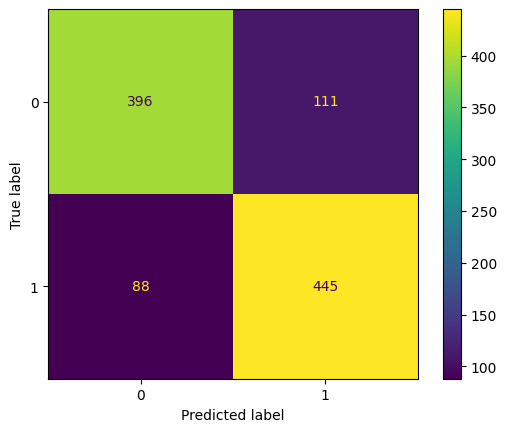

In [ ]:
print("RF MODEL")

eval(rf, X_train, X_test)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8069711538461538

 precision-0          score for count : 0.8402735036167733

 recall-0             score for count : 0.7615857826384143

 f1-0                 score for count : 0.798622157420167

 precision-1          score for count : 0.7799003981538672

 recall-1             score for count : 0.8529290370995731

 f1-1                 score for count : 0.8145116393799305



model 2 AUC score: 0.897069544204773


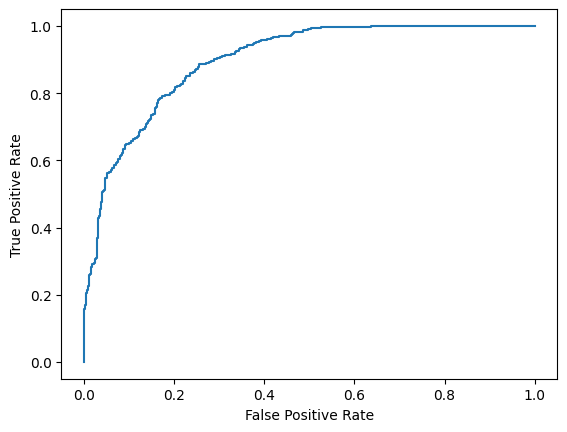

In [ ]:
rf_prob = rf.predict_proba(X_test)
rf_prob = rf_prob[:, 1]
plot_roc_curve(y_test, rf_prob)
print(f'model 2 AUC score: {roc_auc_score(y_test, rf_prob)}')

In [ ]:
# Ada Boosting with count vectorizer
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       507
           1       0.81      0.78      0.79       533

    accuracy                           0.79      1040
   macro avg       0.79      0.79      0.79      1040
weighted avg       0.79      0.79      0.79      1040

Train_Set
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2093
           1       0.86      0.89      0.87      2067

    accuracy                           0.87      4160
   macro avg       0.87      0.87      0.87      4160
weighted avg       0.87      0.87      0.87      4160



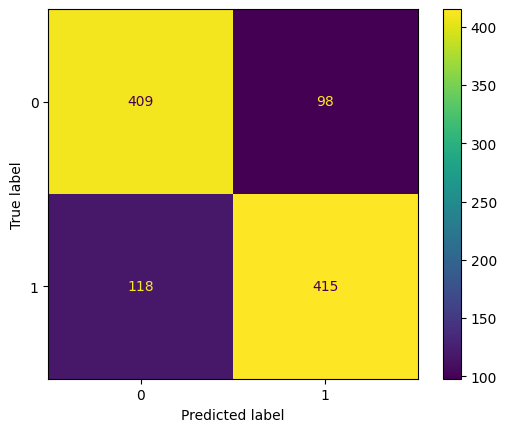

In [ ]:
print("Ada MODEL")

eval(ada, X_train, X_test)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.7855769230769231

 precision-0          score for count : 0.7947518093721513

 recall-0             score for count : 0.774023695602643

 f1-0                 score for count : 0.7839401909603756

 precision-1          score for count : 0.7776065463599943

 recall-1             score for count : 0.7973125087941467

 f1-1                 score for count : 0.7870344968123563



model 5 AUC score: 0.8695301427297386


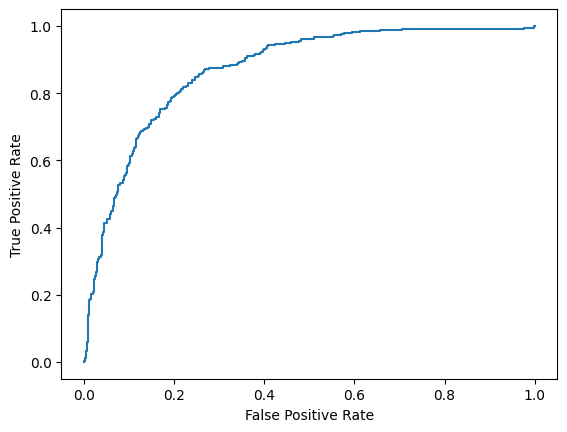

In [ ]:
ada_prob = ada.predict_proba(X_test)
ada_prob = ada_prob[:, 1]
plot_roc_curve(y_test, ada_prob)
print(f'model 5 AUC score: {roc_auc_score(y_test, ada_prob)}')

- increasing the dimension


In [ ]:
# Create TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(doc2vec['text_tokenized'])]

# Train a Doc2Vec model
model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)

# Infer vectors for each document in the DataFrame
doc2vec['doc2vec_vector2'] = doc2vec['text_tokenized'].apply(lambda x: model.infer_vector(x))

doc2vec

,text_processed,quality,text_tokenized,doc2vec_vector,quality2,doc2vec_vector2
0,deathplace burialplace st augustine abbey reli...,FA,"[deathplace, burialplace, st, augustine, abbey...","[1.6378042, -1.3790098, -3.1246614, 6.087968, ...",1,"[-3.4394844, -0.84800994, -0.16700228, 4.05090..."
1,price mb hard disk mb ram discontinue unitssol...,FA,"[price, mb, hard, disk, mb, ram, discontinue, ...","[1.4801595, 1.3353403, -1.8237944, -3.5620701,...",1,"[-0.7765568, 0.18308334, -3.4628327, 0.3910550..."
2,status en statussystem statusref cite january ...,FA,"[status, en, statussystem, statusref, cite, ja...","[-5.4591374, -1.6240929, 0.21434748, 0.0214107...",1,"[-5.1536827, 1.9274217, -0.41116735, -0.463879..."
3,genus rallus specie aquaticus authority linnae...,FA,"[genus, rallus, specie, aquaticus, authority, ...","[-3.2268777, 0.12563373, 1.980967, 1.7206905, ...",1,"[-2.0866704, 2.5202327, 1.2853681, -1.0813818,..."
4,stern front page april hitler diary series six...,FA,"[stern, front, page, april, hitler, diary, ser...","[1.879736, -1.5600429, -6.249099, 3.4955826, 0...",1,"[-5.694331, -1.7207646, 1.3200474, 1.3097951, ..."
...,...,...,...,...,...,...
5195,hededet hedjedjet ddt scorpion goddess ancient...,Stub,"[hededet, hedjedjet, ddt, scorpion, goddess, a...","[-0.28870964, 0.20918466, -0.7275048, 0.352678...",0,"[-0.49978456, -0.013847725, -0.32803744, 0.227..."
5196,glass eel play write nell leyshon broadcast bb...,Stub,"[glass, eel, play, write, nell, leyshon, broad...","[0.4621539, 0.17994754, -0.6930762, 0.6281098,...",0,"[-0.25286484, 0.17424263, -0.40996164, 0.22513..."
5197,carlos manuel bear cuban singer know simply ca...,Stub,"[carlos, manuel, bear, cuban, singer, know, si...","[-0.15335168, 0.74176204, -0.9906701, 0.419429...",0,"[-0.44578028, -0.2654787, -0.42605743, 0.62991..."
5198,groruddalen hill romss background rom church r...,Stub,"[groruddalen, hill, romss, background, rom, ch...","[0.20356993, 0.6681619, -0.5798524, 0.7539782,...",0,"[-0.97264886, 0.28384462, -0.62346023, 0.71228..."


In [ ]:
experiment2 = doc2vec[['doc2vec_vector2', 'quality2']]
experiment2

,doc2vec_vector2,quality2
0,"[-3.4394844, -0.84800994, -0.16700228, 4.05090...",1
1,"[-0.7765568, 0.18308334, -3.4628327, 0.3910550...",1
2,"[-5.1536827, 1.9274217, -0.41116735, -0.463879...",1
3,"[-2.0866704, 2.5202327, 1.2853681, -1.0813818,...",1
4,"[-5.694331, -1.7207646, 1.3200474, 1.3097951, ...",1
...,...,...
5195,"[-0.49978456, -0.013847725, -0.32803744, 0.227...",0
5196,"[-0.25286484, 0.17424263, -0.40996164, 0.22513...",0
5197,"[-0.44578028, -0.2654787, -0.42605743, 0.62991...",0
5198,"[-0.97264886, 0.28384462, -0.62346023, 0.71228...",0


In [ ]:
X = list(experiment2['doc2vec_vector2'])
y = experiment2['quality2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Random Forest with count vectorizer
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       507
           1       0.79      0.87      0.83       533

    accuracy                           0.82      1040
   macro avg       0.82      0.82      0.82      1040
weighted avg       0.82      0.82      0.82      1040

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2093
           1       1.00      0.99      1.00      2067

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



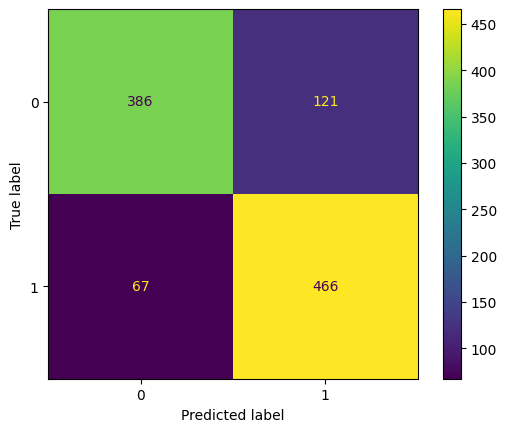

In [ ]:
print("RF MODEL")

eval(rf, X_train, X_test)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8194711538461539

 precision-0          score for count : 0.864123301703408

 recall-0             score for count : 0.7611073137388927

 f1-0                 score for count : 0.8091323409590144

 precision-1          score for count : 0.7844027862437273

 recall-1             score for count : 0.878586839266451

 f1-1                 score for count : 0.8286842881400547



model 2 AUC score: 0.9057028986311711


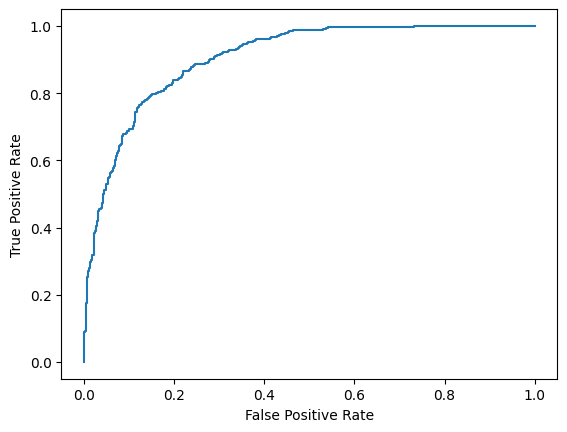

In [ ]:
rf_prob = rf.predict_proba(X_test)
rf_prob = rf_prob[:, 1]
plot_roc_curve(y_test, rf_prob)
print(f'model 2 AUC score: {roc_auc_score(y_test, rf_prob)}')

In [ ]:
# Create TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(doc2vec['text_tokenized'])]

# Train a Doc2Vec model
model = Doc2Vec(documents, vector_size=200, window=2, min_count=1, workers=4)

# Infer vectors for each document in the DataFrame
doc2vec['doc2vec_vector3'] = doc2vec['text_tokenized'].apply(lambda x: model.infer_vector(x))

doc2vec

,text_processed,quality,text_tokenized,doc2vec_vector,quality2,doc2vec_vector2,doc2vec_vector3
0,deathplace burialplace st augustine abbey reli...,FA,"[deathplace, burialplace, st, augustine, abbey...","[1.6378042, -1.3790098, -3.1246614, 6.087968, ...",1,"[-3.4394844, -0.84800994, -0.16700228, 4.05090...","[-0.90883076, -0.9110955, -0.9782425, 0.506188..."
1,price mb hard disk mb ram discontinue unitssol...,FA,"[price, mb, hard, disk, mb, ram, discontinue, ...","[1.4801595, 1.3353403, -1.8237944, -3.5620701,...",1,"[-0.7765568, 0.18308334, -3.4628327, 0.3910550...","[-0.47413653, -3.135468, 0.40716136, 0.6622522..."
2,status en statussystem statusref cite january ...,FA,"[status, en, statussystem, statusref, cite, ja...","[-5.4591374, -1.6240929, 0.21434748, 0.0214107...",1,"[-5.1536827, 1.9274217, -0.41116735, -0.463879...","[-0.022974323, -1.3683952, 0.07342262, -1.3026..."
3,genus rallus specie aquaticus authority linnae...,FA,"[genus, rallus, specie, aquaticus, authority, ...","[-3.2268777, 0.12563373, 1.980967, 1.7206905, ...",1,"[-2.0866704, 2.5202327, 1.2853681, -1.0813818,...","[-0.8084625, -0.40513402, -2.2122853, -2.37009..."
4,stern front page april hitler diary series six...,FA,"[stern, front, page, april, hitler, diary, ser...","[1.879736, -1.5600429, -6.249099, 3.4955826, 0...",1,"[-5.694331, -1.7207646, 1.3200474, 1.3097951, ...","[-0.609429, 0.38322115, 1.6274294, 0.8814033, ..."
...,...,...,...,...,...,...,...
5195,hededet hedjedjet ddt scorpion goddess ancient...,Stub,"[hededet, hedjedjet, ddt, scorpion, goddess, a...","[-0.28870964, 0.20918466, -0.7275048, 0.352678...",0,"[-0.49978456, -0.013847725, -0.32803744, 0.227...","[0.14066383, -0.46098152, 0.055467278, -0.1364..."
5196,glass eel play write nell leyshon broadcast bb...,Stub,"[glass, eel, play, write, nell, leyshon, broad...","[0.4621539, 0.17994754, -0.6930762, 0.6281098,...",0,"[-0.25286484, 0.17424263, -0.40996164, 0.22513...","[0.18561244, -0.52541244, 0.1895146, -0.255396..."
5197,carlos manuel bear cuban singer know simply ca...,Stub,"[carlos, manuel, bear, cuban, singer, know, si...","[-0.15335168, 0.74176204, -0.9906701, 0.419429...",0,"[-0.44578028, -0.2654787, -0.42605743, 0.62991...","[-0.033079047, -0.530082, -0.111119665, -0.042..."
5198,groruddalen hill romss background rom church r...,Stub,"[groruddalen, hill, romss, background, rom, ch...","[0.20356993, 0.6681619, -0.5798524, 0.7539782,...",0,"[-0.97264886, 0.28384462, -0.62346023, 0.71228...","[-0.28312802, -0.93300927, -0.19711526, 0.0105..."


In [ ]:
experiment3 = doc2vec[['doc2vec_vector3', 'quality2']]
experiment3

,doc2vec_vector3,quality2
0,"[-0.90883076, -0.9110955, -0.9782425, 0.506188...",1
1,"[-0.47413653, -3.135468, 0.40716136, 0.6622522...",1
2,"[-0.022974323, -1.3683952, 0.07342262, -1.3026...",1
3,"[-0.8084625, -0.40513402, -2.2122853, -2.37009...",1
4,"[-0.609429, 0.38322115, 1.6274294, 0.8814033, ...",1
...,...,...
5195,"[0.14066383, -0.46098152, 0.055467278, -0.1364...",0
5196,"[0.18561244, -0.52541244, 0.1895146, -0.255396...",0
5197,"[-0.033079047, -0.530082, -0.111119665, -0.042...",0
5198,"[-0.28312802, -0.93300927, -0.19711526, 0.0105...",0


In [ ]:
X = list(experiment3['doc2vec_vector3'])
y = experiment3['quality2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Random Forest with count vectorizer
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       507
           1       0.78      0.91      0.84       533

    accuracy                           0.82      1040
   macro avg       0.83      0.82      0.82      1040
weighted avg       0.83      0.82      0.82      1040

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2093
           1       1.00      0.99      1.00      2067

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



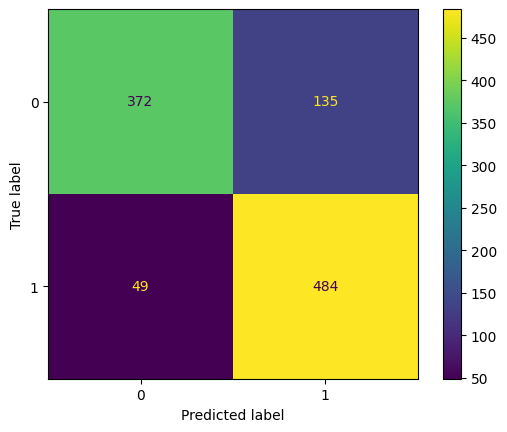

In [ ]:
print("RF MODEL")

eval(rf, X_train, X_test)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8192307692307692

 precision-0          score for count : 0.8908225392666014

 recall-0             score for count : 0.7305627705627706

 f1-0                 score for count : 0.8022980633742908

 precision-1          score for count : 0.7697591353819283

 recall-1             score for count : 0.9090544533558462

 f1-1                 score for count : 0.8333782420819007



model 2 AUC score: 0.9062875835858951


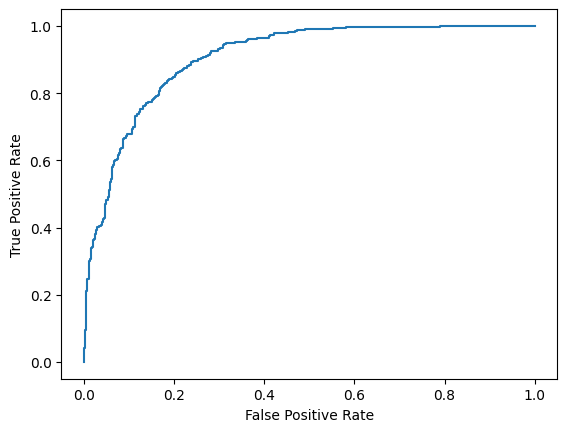

In [ ]:
rf_prob = rf.predict_proba(X_test)
rf_prob = rf_prob[:, 1]
plot_roc_curve(y_test, rf_prob)
print(f'model 2 AUC score: {roc_auc_score(y_test, rf_prob)}')